In [9]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import pandas as pd
import numpy.ma as ma
import math

In [9]:
pwd

"C:\\Users\\almog\\Desktop\\Almog's_WorkFile\\PandasAndJupyter\\Statistics Homework\\Statistics Homework 2"

In [11]:
path = "C:\\Users\\almog\\Desktop\\Almog's_WorkFile\\PandasAndJupyter\\Statistics Homework\\Statistics Homework 2\\grades.csv"
df = pd.read_csv(path)
df

,school,math,gym
0,A,77,76
1,A,80,60
2,A,74,63
3,A,75,60
4,A,75,98
...,...,...,...
995,C,91,60
996,C,90,89
997,C,88,62
998,C,90,60


In [172]:
def w_c(x_val,a_val,h):
    if(abs((x_val-a_val)/h)<=0.5):
        return 1+math.cos( 2*math.pi*((x_val-a_val)/h))
    else:
        return 0

In [267]:
def kernel_debsity(x,h,Dif_Plot = True , lab_of_line = "some line"):
    #Creating AXIS
    t=np.linspace(min(x)-h,max(x)+h)
    y=np.array([])
    n= x.size
    
    #iterating On X Axis and Creating Y Axis
    for a in t:
        mask = np.logical_and((a-h)/2 <= x , x <= (a+h)/2)
        x_masked = x[mask]
        J_func = (np.array([w_c(xi,a,h) for xi in x]).sum())/(n*h)
        y = np.append(y,J_func)
    
    #Plotting
    if(Dif_Plot):
        fig, ax = plt.subplots()
        ax.plot(t,np.array(y),label= 'Kernel_Debsity')
        ax.set_ylabel('Density')
        ax.set_title("Kernel_Debsity, Window Size:"+str(h)+" Number Of Samples:"+str(x.size))
    else:
        plt.plot(t,np.array(y),label = lab_of_line)
        plt.ylabel('Density')
        plt.title("Kernel_Debsity, Window Size:"+str(h)+" Number Of Samples:"+str(x.size))
        plt.legend()

## 1.ב
#### Val = Math Colum
Finding the best window for The Value Given

In [181]:
df_math = df['math']
df_math = df_math.to_numpy()

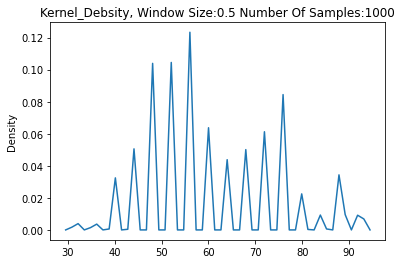

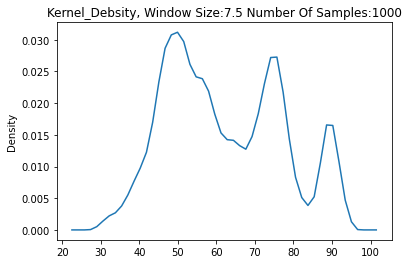

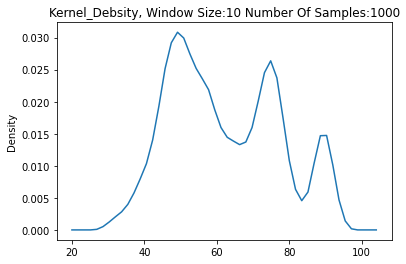

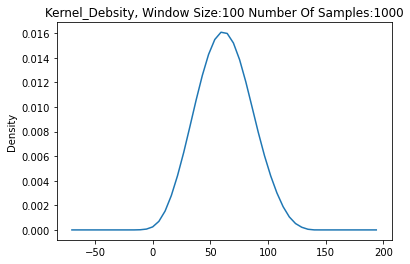

In [263]:
kernel_debsity(df_math,0.5)
kernel_debsity(df_math,7.5)
kernel_debsity(df_math,10)
kernel_debsity(df_math,100)
plt.show()

ניתן לראות על פי הגרפים כי הגרף שמייצג את ההתפלגות בצורה הטובה ביותר היינו ברוחב חלון של 7.5 מכיוון שמציג את הנתונים בצורה יציבה חלקה ומציג שיאים ללא שיאיי קצה כמו גרף עם חלון 0.5 אשר קטן מדיי

## 1.ג
קיימים 3 שיאים בהתפלגות
שהם בערך 52,75,90
ניתן לבדוק עלידי חיפוש מקסימום לוקלי

## 1.ד

In [264]:
df_schools = df[['school','math']]
gb_schools = df_schools.groupby('school')
school_A = ((gb_schools.get_group('A')).drop(['school'],axis=1).reset_index()).drop(['index'],axis=1)
school_B = ((gb_schools.get_group('B')).drop(['school'],axis=1).reset_index()).drop(['index'],axis=1)
school_C = ((gb_schools.get_group('C')).drop(['school'],axis=1).reset_index()).drop(['index'],axis=1)

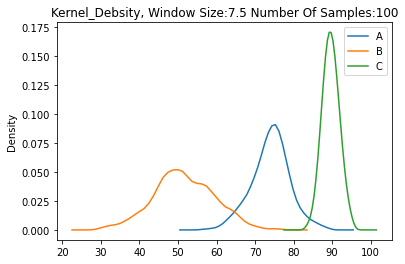

In [268]:
kernel_debsity(np.array(school_A),7.5,False,"A")
kernel_debsity(np.array(school_B),7.5,False,"B")
kernel_debsity(np.array(school_C),7.5,False,"C")

ניתן לראות לפי ההיסטוגרמות כי ריכוז התלמידים בעליי הציון הגבוהה ביותר קיימים בבית ספר C והשונות של הנתונים נמוכה  

## 1.ה

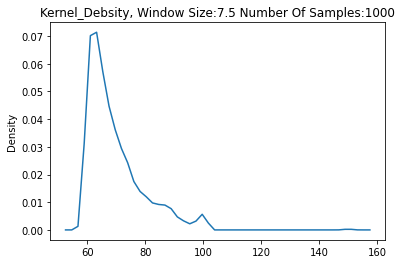

In [271]:
df_gym = df['gym']
df_gym = df_gym.to_numpy()
kernel_debsity(df_gym,7.5)

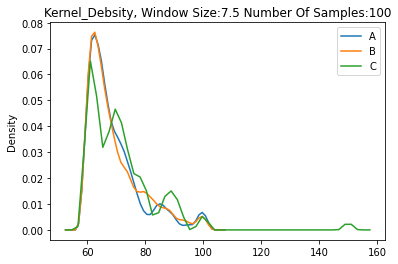

In [272]:
df_schools_2 = df[['school','gym']]
gb_schools_2 = df_schools_2.groupby('school')
school_A_gym = ((gb_schools_2.get_group('A')).drop(['school'],axis=1).reset_index()).drop(['index'],axis=1)
school_B_gym = ((gb_schools_2.get_group('B')).drop(['school'],axis=1).reset_index()).drop(['index'],axis=1)
school_C_gym = ((gb_schools_2.get_group('C')).drop(['school'],axis=1).reset_index()).drop(['index'],axis=1)
kernel_debsity(np.array(school_A_gym),7.5,False,"A")
kernel_debsity(np.array(school_B_gym),7.5,False,"B")
kernel_debsity(np.array(school_C_gym),7.5,False,"C")

לא ניתן להגיע לאותן מסקנות מכיוון שהתפלגות הציונים עבור בתי הספר השונים היינה שונה נשים לב כי הקו איינו חלק ואף ישנם שיאים שונים ומשונים עבור על בית ספר שנמדד, ההתפלוגת הרבה יותר צפופה

# שאלה 2

In [357]:
def quantile(arr,q):
    n = arr.size
    sum = 0
    for a in arr:
        sum+=1/n
        if(sum>=q):
            return a
    return arr[-1]

def Alpha_Average(arr,alpha):
    quantile_min = quantile(arr,alpha)
    quantile_max = quantile(arr,1-alpha)
    arr_alpha = arr[np.logical_and(quantile_min <= arr, arr<= quantile_max)]
    return np.average(arr_alpha)

arr = np.array([100 ,84,88 ,96 ,0 ,69 ,38 ,92])
arr.sort()
arr

array([  0,  38,  69,  84,  88,  92,  96, 100])

In [365]:
print(arr)
print ("The average is: "+str(np.average(arr)))
print("The avrage cutted by Alpha = 0.2 is: " +str(Alpha_Average(arr,.2)))
print("The median is: " + str(np.median(arr)))
print("The quantile = 65% is: " + str(quantile(arr,0.65)))

[  0  38  69  84  88  92  96 100]
The average is: 70.875
The avrage cutted by Alpha = 0.2 is: 77.83333333333333
The median is: 86.0
The quantile = 65% is: 92


In [366]:
arr_2 = np.array([  0,  38,  69,  84,  88,  200,  96, 100])
arr_2.sort()
print(arr_2)
print ("The average is: "+str(np.average(arr_2)))
print("The avrage cutted by Alpha = 0.2 is: " +str(Alpha_Average(arr_2,.2)))
print("The median is: " + str(np.median(arr_2)))
print("The quantile = 65% is: " + str(quantile(arr_2,0.65)))

[  0  38  69  84  88  96 100 200]
The average is: 84.375
The avrage cutted by Alpha = 0.2 is: 79.16666666666667
The median is: 86.0
The quantile = 65% is: 96


ניתן ללמוד כי כלל כי הערכים ניתנים לשינוי אך ממוצעים יותר רגישים לשינויים

# שאלה 3

In [389]:
from scipy.stats import poisson as pois

1 26.0
2 14.0
3 IQR: 23.0-17.0 = 6.0
4 0.22107420155444113
5 4.523368140509795


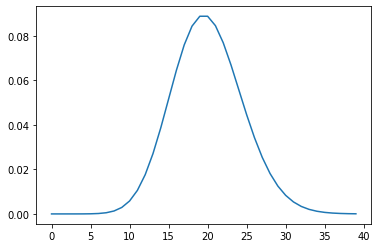

In [394]:
# x=np.arange(0,40,1)
y=poisson.pmf(x,20)
plt.plot(x,y)
print(1,pois.ppf(0.9,20))
print(2,pois.ppf(0.1,20))
print(3,"IQR: "+ str(pois.ppf(0.75,20)) +"-"+ str(pois.ppf(0.25,20)) +" = "+str(pois.ppf(0.75,20)-pois.ppf(0.25,20)))
print(4,pois.cdf(16,20))
print(5,1/pois.cdf(16,20))

1.disprove: arr = [1,2] T(arr ,X(q=0.9) ) = 2
            T(-Arr,X(q=0.9) = -1 != -2

2.Prove: 

𝑇𝛼(𝑋+c) = (1/(n-2𝛼))Sum(x(n*𝛼+1)+c ,....,x(n-n*𝛼)+c) 

= (1/(n-2𝛼)){(c*(n-2𝛼))+Sum(x(n*𝛼+1),....,x(n-n*𝛼))} 

=(1/(n-2𝛼))*Sum(x(n*𝛼+1),....,x(n-n*𝛼))+C = 𝑇𝛼(𝑋)+c 

 𝑇𝛼(c𝑋) = (1/(n-2𝛼))*Sum(c*x(n*𝛼+1),....,c*x(n-n*𝛼))=
 
         =(1/(n-2𝛼))c*Sum(x(n*𝛼+1),....,x(n-n*𝛼)) =
         
         =c*(1/(n-2𝛼))Sum(x(n*𝛼+1),....,x(n-n*𝛼)) = 
         
         =c*𝑇𝛼(𝑋)
        

3.Disprove: IQR(X+C) = X(0.75)+C - (X(0.25)+C) = X(0.75)-X(0.25) != IQR(X)+C  

4. Disprove -T(X) = Min(𝑋̅, 𝑀𝑑) , Example : X = [0,0,0,5,5]
    
                   -2=T(-1*X)!=-1T(X)=0 

5. Disprove = Tsum(X+C) = T1(X+C) + T2(X+C) 

            = T2(X)+C +T2(X) +C 
            
            = T1(X) + T2(X) + 2C
            
            != T1(X) +T2(X) + C 

6.Prove: 𝑇(𝑋) = 𝑤𝑇1(𝑋) + (1 − 𝑤)𝑇2(𝑋)
         
         T(cX) = wT1(CX) +(1-W)T2(CX)
         
         T(cX) = CwT1(X) +C(1-W)T2(X)
          
         T(cX) = C(wT1(X) +(1-W)T2(X))
         
         T(cX) = C*(T(X))
          
         T(X+C) = 𝑤𝑇1(𝑋+C) + (1 − 𝑤)𝑇2(𝑋+C)
         
         T(X+C) = 𝑤(𝑇1(𝑋)+C) + (1 − 𝑤)(𝑇2(𝑋)+C)
         
         T(X+C) = 𝑤𝑇1(𝑋)+ wC + (1 − 𝑤)𝑇2(𝑋)+C - wc
         
         T(X+C) = 𝑤𝑇1(𝑋) + (1 − 𝑤)𝑇2(𝑋) + C
         
         T(X+C) = T(X) + C
        